In [1]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)


From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [2]:
df = pd.read_csv(s, header = None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Perceptron usage

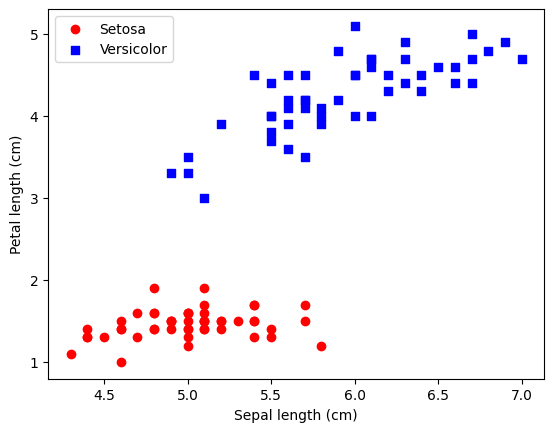

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# Plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker = 'o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc='upper left')
plt.show();

In [4]:
# import perceptron
# ppn = perceptron.Perceptron()

both upper and lower work

In [5]:
from perceptron import Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)

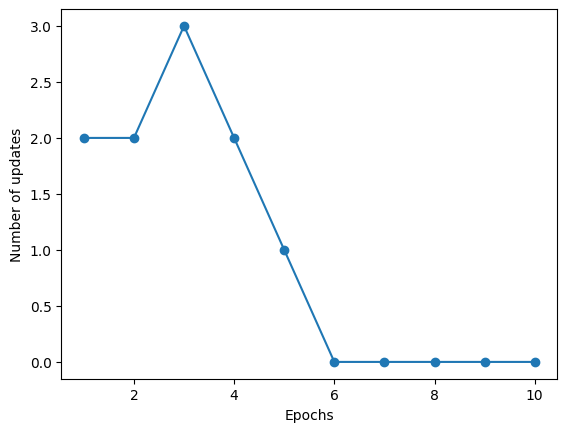

In [6]:
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [7]:
from helper_functions import plot_decision_regions

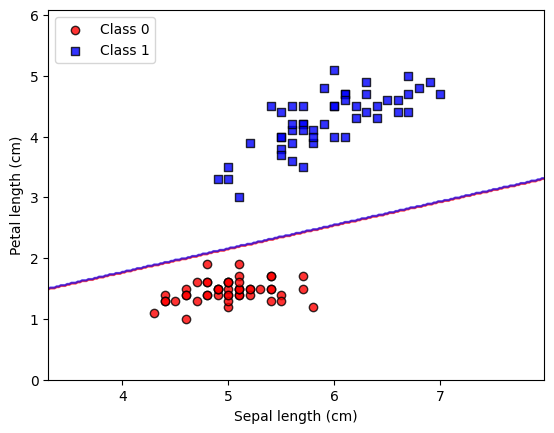

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc='upper left')
plt.show()

### Adaline usage

In [9]:
from adaline import AdalineGD
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X,y)
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)

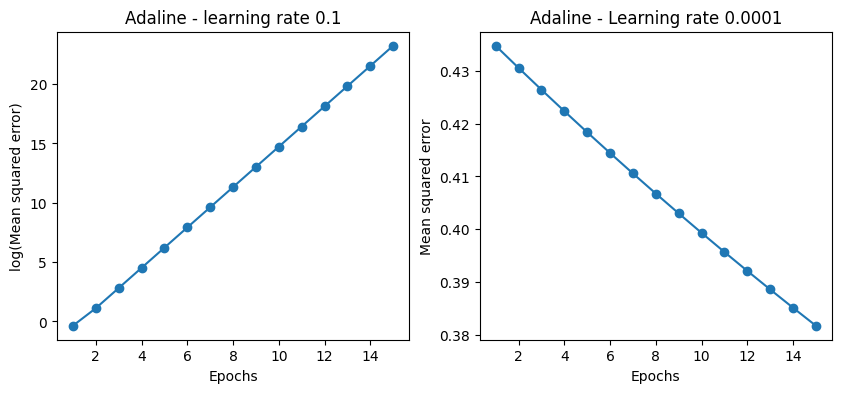

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize =(10, 4))
ax[0].plot(range(1, len(ada1.losses_) + 1),
           np.log10(ada1.losses_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - learning rate 0.1')
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

Feature scaling (such as standardization) helps gradient descent learning to converge more quickly. (don't forget it does not make the original dataset normaly distributed).
This makes it easier to find a learning rate that works well for all weights (and the bias). 

In [11]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


In [12]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

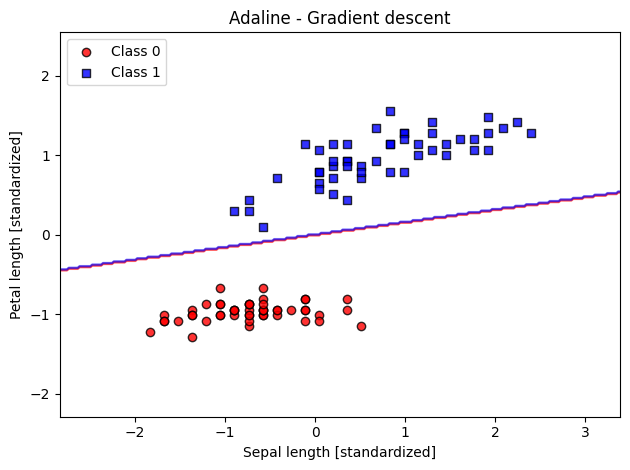

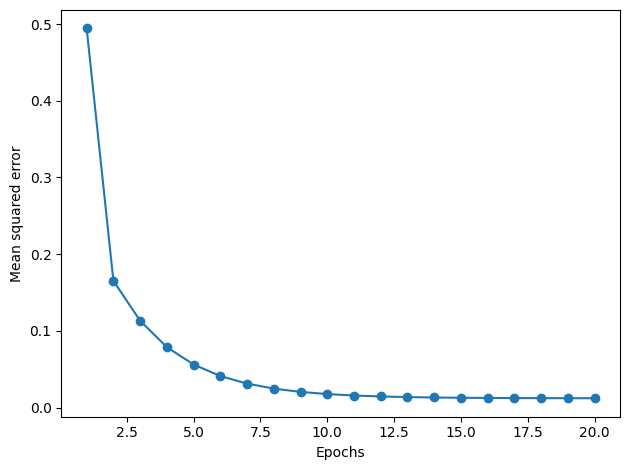

In [13]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

#### Note that stochastic gradient descent (SGD) is also called iterative or online gradient descent. It does not use the whole training batch to update the parameters; we use each training example (observation). It is approx of GD, but reaches convergence faster due to more frequent weight updates (especially large datasets). 
#### A compromise is a mini-batch gradient descent.  It's applying full batch GD to to smaller subsets of the training data. Can be used with vectorized operations (weighted sum via a dot product) to replace for loops. 

-------------------------------------------------

## ADAlineSGD implementation


In [14]:
from adalineSGD import AdalineSGD
ada_sgd = AdalineSGD(n_iter=15, eta=0.1, random_state=1)
ada_sgd.fit(X_std, y)

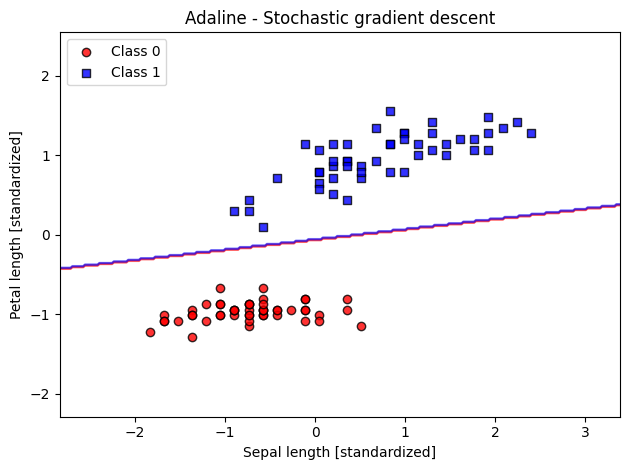

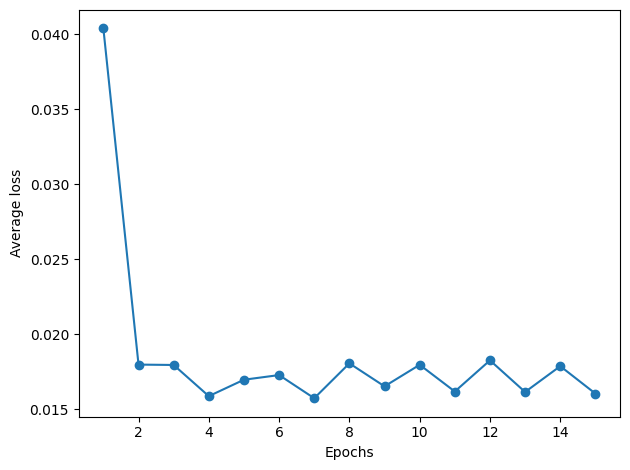

In [15]:
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()

In [16]:
# For streaming data, can call partil_fit on individual training examples
ada_sgd.partial_fit(X_std[0, :], y[0])